In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import requests
from io import BytesIO
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
url = "https://github.com/vixbi/Theory-of-formal-languages/raw/main/disambiguation_ds.zip"

response = requests.get(url)

with zipfile.ZipFile(BytesIO(response.content)) as zip_file:
    csv_files = [f for f in zip_file.namelist() if f.endswith('.csv')]
    csv_filename = csv_files[0]
    with zip_file.open(csv_filename) as csv_file:
        disamb_df = pd.read_csv(csv_file)
len(disamb_df)

481537

In [35]:
disamb_df["lemma_id"], unique_lemmas = pd.factorize(disamb_df["lemma"])
to_drop = ['word_id', 'word', 'is_correct', 'lemma']
X = disamb_df.drop(columns = to_drop)
y = disamb_df.is_correct

X_train = X.head(round(0.9*len(disamb_df)))
X_test = X.tail(len(disamb_df)-round(0.9*len(disamb_df)))
y_train = y.head(round(0.9*len(disamb_df)))
y_test = y.tail(len(disamb_df)-round(0.9*len(disamb_df)))

In [36]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

433383 48154 433383 48154


In [37]:
cls = RandomForestClassifier()
cls.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
preds = cls.predict(X_test)
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

       False       0.94      0.88      0.91     33857
        True       0.76      0.87      0.81     14297

    accuracy                           0.88     48154
   macro avg       0.85      0.88      0.86     48154
weighted avg       0.89      0.88      0.88     48154



In [39]:
disamb_df.head()

,word_id,word,lemma,is_correct,curr_pos,curr_animacy,curr_aspect,curr_case,curr_degree,curr_foreign,...,ctx_3_gender,ctx_3_mood,ctx_3_number,ctx_3_person,ctx_3_polarity,ctx_3_tense,ctx_3_variant,ctx_3_verbform,ctx_3_voice,lemma_id
0,2,организовал,рганизовать,True,16,-1,2,-1,-1,-1,...,2,-1,1,-1,-1,-1,-1,-1,-1,0
1,2,организовал,организовывать,False,16,-1,2,-1,-1,-1,...,2,-1,1,-1,-1,-1,-1,-1,-1,1
2,2,организовал,организовать,False,16,-1,2,-1,-1,-1,...,2,-1,1,-1,-1,-1,-1,-1,-1,2
3,3,в,в,True,2,-1,-1,-1,-1,-1,...,2,-1,1,-1,-1,-1,-1,-1,-1,3
4,3,в,в1,False,2,-1,-1,-1,-1,-1,...,2,-1,1,-1,-1,-1,-1,-1,-1,4


AUC: 0.951


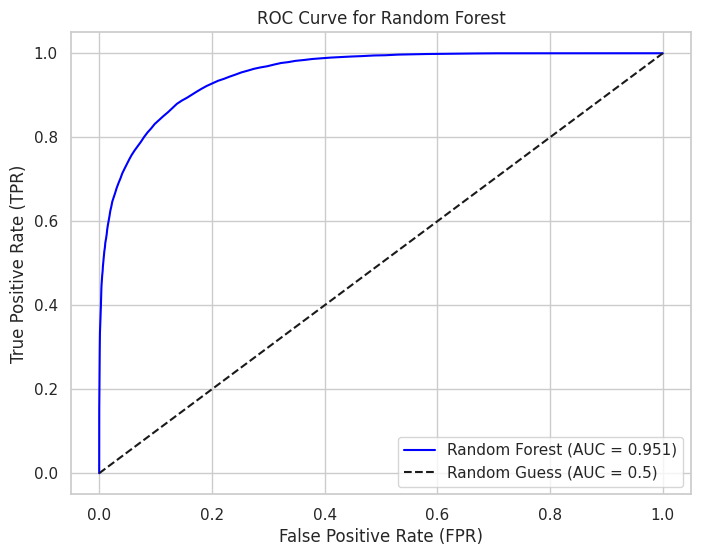

In [45]:
y_probs = cls.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc_score:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.3f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.grid(True)
plt.show()